In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib

In [22]:
df = pd.read_csv("asd_dt.csv")

In [23]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,Male,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,Male,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,Female,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,Female,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,Female,no,no,YES


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jaundice    6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


In [25]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,0.693169,0.485103,0.537449,0.547490,0.543868,0.443128,0.497942,0.538436,0.429794,0.599835,19.838025
std,0.461217,0.499819,0.498637,0.497781,0.498113,0.496796,0.500037,0.498562,0.495087,0.489972,14.934246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,19.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000


In [26]:
df.isnull().sum()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


<ipython-input-27-40dbf7037e95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='coolwarm')
<ipython-input-27-40dbf7037e95>:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


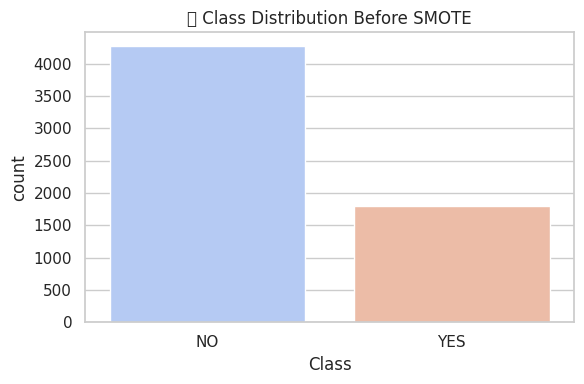

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='coolwarm')
plt.title("📊 Class Distribution Before SMOTE")
plt.tight_layout()
plt.show()

In [28]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Jaundice'] = df['Jaundice'].map({'yes': 1, 'no': 0})
df['Family_ASD'] = df['Family_ASD'].map({'yes': 1, 'no': 0})
df['Class'] = df['Class'].map({'YES': 1, 'NO': 0})


features = df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age','Sex','Jaundice','Family_ASD']]
labels = df['Class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [30]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {
    "Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []
}
conf_matrices = {}
best_model = None
best_score = 0

for name, model in models.items():
    print(f"\n🔍 Training and evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    if acc > best_score:
        best_score = acc
        best_model = (name, model)

joblib.dump(best_model[1], 'model.pkl')
print(f"\n✅ Best model '{best_model[0]}' saved as model.pkl with accuracy: {best_score:.2f}")


🔍 Training and evaluating: Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       848
           1       0.99      0.98      0.98       367

    accuracy                           0.99      1215
   macro avg       0.99      0.98      0.99      1215
weighted avg       0.99      0.99      0.99      1215


🔍 Training and evaluating: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       848
           1       0.84      0.85      0.84       367

    accuracy                           0.91      1215
   macro avg       0.89      0.89      0.89      1215
weighted avg       0.91      0.91      0.91      1215


🔍 Training and evaluating: SVM (RBF Kernel)
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       848
           1       0.95      0.84      0.89       367

    accuracy                           0.94    

In [31]:
results_df = pd.DataFrame(results)
sns.set(style="whitegrid")


<ipython-input-32-4903ab416bad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
<ipython-input-32-4903ab416bad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
<ipython-input-32-4903ab416bad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
<ipython-input-32-4903ab416bad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

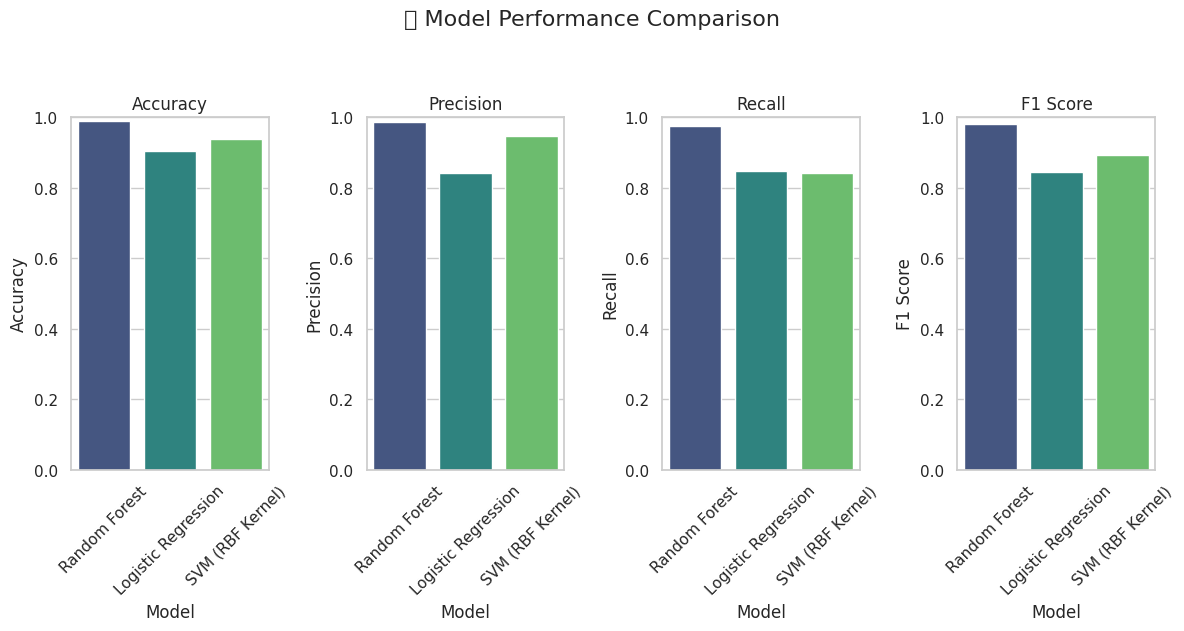

In [32]:
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i + 1)
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.title(metric)
plt.suptitle("📊 Model Performance Comparison", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
<ipython-input-33-8678183d7741>:8: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


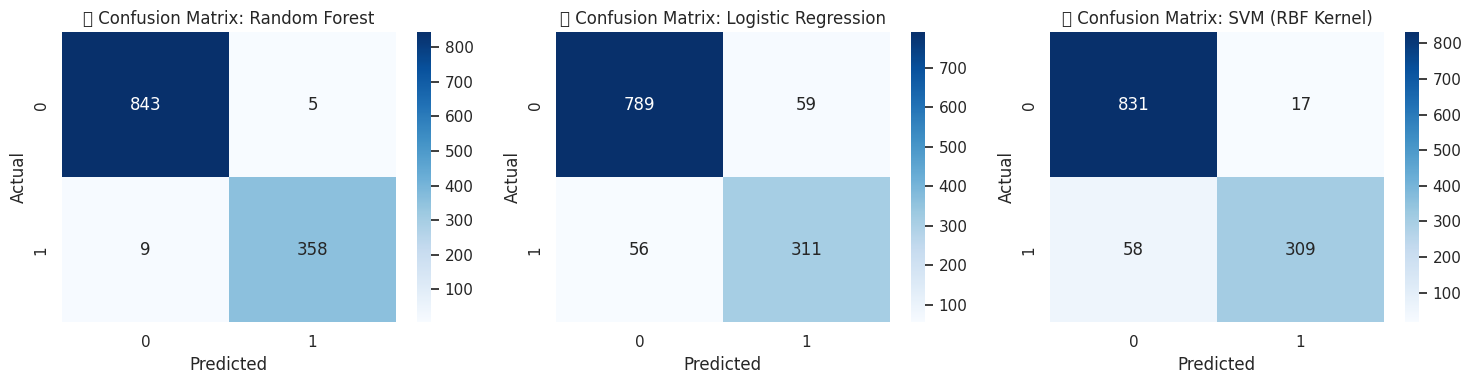

In [33]:
plt.figure(figsize=(15, 4))
for i, (name, cm) in enumerate(conf_matrices.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"🧮 Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

<ipython-input-34-af512bcf915d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="magma")
<ipython-input-34-af512bcf915d>:8: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


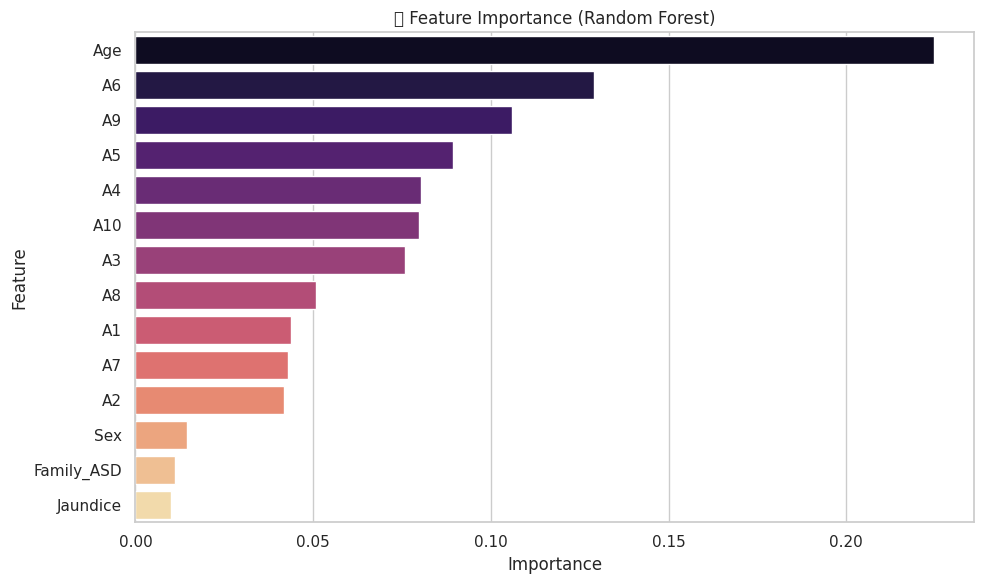

In [34]:
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({"Feature": features.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="magma")
plt.title("🌲 Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()